In [1]:
# Import dependencies
from ipynb.fs.full.emissions_analysis import main_df
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
continents_data = 'continents.csv'
continents = pd.read_csv(continents_data)
continents_clean = pd.DataFrame({'Country': continents['name'], 'Region': continents['region'], 'Sub-Region': continents['sub-region']})
continents_clean

,Country,Region,Sub-Region
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia
...,...,...,...
244,Wallis and Futuna,Oceania,Polynesia
245,Western Sahara,Africa,Northern Africa
246,Yemen,Asia,Western Asia
247,Zambia,Africa,Sub-Saharan Africa


In [3]:
main_df

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C,rice_yield
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167,1.9029
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667,1.9364
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583,1.7143
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917,1.7143
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250,1.9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250,0.3428
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500,0.3745
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333,0.3983
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667,0.4484


In [4]:
merged_df = pd.merge(main_df, continents_clean, how='left')
merged_df

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C,rice_yield,Region,Sub-Region
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167,1.9029,Asia,Southern Asia
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667,1.9364,Asia,Southern Asia
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583,1.7143,Asia,Southern Asia
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917,1.7143,Asia,Southern Asia
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250,1.9000,Asia,Southern Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250,0.3428,Africa,Sub-Saharan Africa
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500,0.3745,Africa,Sub-Saharan Africa
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333,0.3983,Africa,Sub-Saharan Africa
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667,0.4484,Africa,Sub-Saharan Africa


In [23]:
# Isolating relevant datapoints for analysis
# yield_df = main_df[['Country', 'Year', 'Rice Cultivation', 'Forestland', 'rice_yield']]
yield_df = pd.DataFrame({'Country':merged_df['Country'],'Region': merged_df['Region'], 'Sub-Region': merged_df['Sub-Region'],'Year': merged_df['Year'],
                                   "Methane": merged_df['Rice Cultivation'],
                                   "CO2 Released from Forestland": merged_df['Forestland'],
                                   "Rice Yield": merged_df['rice_yield']})

# Further cleaning and data-wrangling/formatting
cleaned_yields = yield_df.dropna()
cleaned_yields.reset_index(drop=True)

cleaned_yields.set_index('Country')


,Region,Sub-Region,Year,Methane,CO2 Released from Forestland,Rice Yield
Country,,,,,,
Afghanistan,Asia,Southern Asia,1990,686.0000,-2388.8030,1.9029
Afghanistan,Asia,Southern Asia,1991,678.1600,-2388.8030,1.9364
Afghanistan,Asia,Southern Asia,1992,686.0000,-2388.8030,1.7143
Afghanistan,Asia,Southern Asia,1993,686.0000,-2388.8030,1.7143
Afghanistan,Asia,Southern Asia,1994,705.6000,-2388.8030,1.9000
...,...,...,...,...,...,...
Zimbabwe,Africa,Sub-Saharan Africa,2016,7.4088,76500.2982,0.3428
Zimbabwe,Africa,Sub-Saharan Africa,2017,7.9458,76500.2982,0.3745
Zimbabwe,Africa,Sub-Saharan Africa,2018,8.1399,76500.2982,0.3983


In [6]:
regional_data = cleaned_yields.groupby(['Region','Year'])['Rice Yield'].mean()
regional_data_df = pd.DataFrame(regional_data)

regional_data_df.reset_index(level='Year')


,Year,Rice Yield
Region,,
Africa,1990,2.390964
Africa,1991,2.377654
Africa,1992,2.285707
Africa,1993,2.266957
Africa,1994,2.270632
...,...,...
Oceania,2016,5.122200
Oceania,2017,4.970467
Oceania,2018,5.164133


In [7]:
regions = cleaned_yields['Region'].unique()
sub_regions = cleaned_yields['Sub-Region'].unique()
print(regions)
print(sub_regions)

['Asia' 'Europe' 'Africa' 'Americas' 'Oceania']
['Southern Asia' 'Southern Europe' 'Northern Africa' 'Sub-Saharan Africa'
 'Latin America and the Caribbean' 'Australia and New Zealand'
 'Western Asia' 'Eastern Europe' 'South-eastern Asia' 'Eastern Asia'
 'Melanesia' 'Western Europe' 'Central Asia']


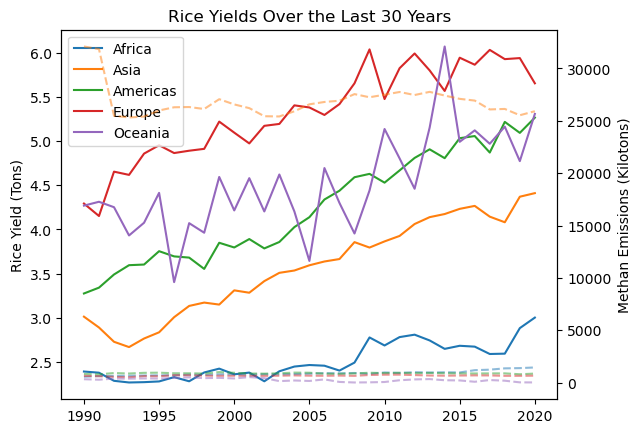

In [58]:
# Separate out regions for plotting
africa = cleaned_yields.loc[cleaned_yields['Region'] == 'Africa', ['Year','Rice Yield']]
africa_yields = africa.groupby('Year')['Rice Yield'].mean()
africa_ch4 = cleaned_yields.loc[cleaned_yields['Region'] == 'Africa', ['Year','Methane']]
africa_ch4_yields = africa_ch4.groupby('Year')['Methane'].mean()

americas = cleaned_yields.loc[cleaned_yields['Region'] == 'Americas', ['Year','Rice Yield']]
amer_yields = americas.groupby('Year')['Rice Yield'].mean()
americas_ch4 = cleaned_yields.loc[cleaned_yields['Region'] == 'Americas', ['Year','Methane']]
amer_ch4_yields = americas_ch4.groupby('Year')['Methane'].mean()

asia = cleaned_yields.loc[cleaned_yields['Region'] == 'Asia', ['Year','Rice Yield']]
asian_yields = asia.groupby('Year')['Rice Yield'].mean()
asia_ch4 = cleaned_yields.loc[cleaned_yields['Region'] == 'Asia', ['Year','Methane']]
asian_ch4_yields = asia_ch4.groupby('Year')['Methane'].mean()

europe = cleaned_yields.loc[cleaned_yields['Region'] == 'Europe', ['Year','Rice Yield']]
euro_yields = europe.groupby('Year')['Rice Yield'].mean()
europe_ch4 = cleaned_yields.loc[cleaned_yields['Region'] == 'Europe', ['Year','Methane']]
euro_ch4_yields = europe_ch4.groupby('Year')['Methane'].mean()

ocean = cleaned_yields.loc[cleaned_yields['Region'] == 'Oceania', ['Year','Rice Yield']]
ocean_yields = ocean.groupby('Year')['Rice Yield'].mean()
ocean_ch4 = cleaned_yields.loc[cleaned_yields['Region'] == 'Oceania', ['Year','Methane']]
ocean_ch4_yields = ocean_ch4.groupby('Year')['Methane'].mean()

fig1, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(africa_yields, label='Africa'), ax1.plot(asian_yields, label='Asia'), ax1.plot(amer_yields, label='Americas'), \
        ax1.plot(euro_yields, label='Europe'), ax1.plot(ocean_yields, label='Oceania'), \
        ax2.plot(africa_ch4_yields, label='Africa CH4', alpha=.5, linestyle='dashed'), \
        ax2.plot(asian_ch4_yields, label='Asia CH4', alpha=.5, linestyle='dashed'), \
        ax2.plot(amer_ch4_yields, label='Americas CH4', alpha=.5,linestyle='dashed'), \
        ax2.plot(euro_ch4_yields, label='European CH4', alpha=.5, linestyle='dashed'), \
        ax2.plot(ocean_ch4_yields, label='Oceania CH4', alpha=.5, linestyle='dashed')
ax1.legend()
# plt.xlabel('Year')
ax1.set_ylabel('Rice Yield (Tons)')
ax2.set_ylabel('Methane Emissions (Kilotons)')
plt.title('Rice Yields Over the Last 30 Years')
plt.show()
# fig, ax1 = plt.subplots()

# ax2 = ax1.twinx()
# ax1.plot(x, y1, 'g-')
# ax2.plot(x, y2, 'b-')

# ax1.set_xlabel('X data')
# ax1.set_ylabel('Y1 data', color='g')
# ax2.set_ylabel('Y2 data', color='b')

## Methane emissions seem to have a weak link to rice yields.
--- 
Over the last thirty years, methane emissions have remained relatively stable, while rice yields have climbed steadily. 

In [59]:
# Linear Regression for Regional Rice Yields vs Methane Emissions. 

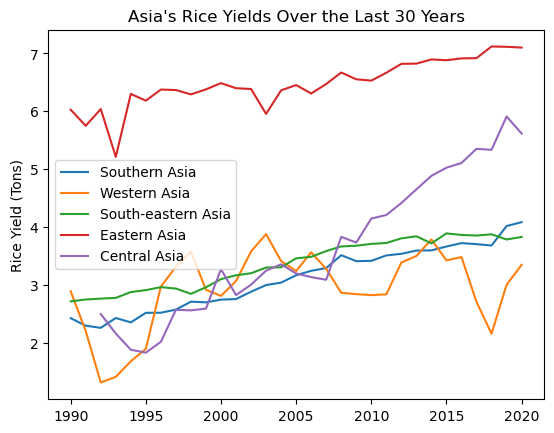

In [54]:
south_asia = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Southern Asia', ['Year','Rice Yield']]
south_asia_yields = south_asia.groupby('Year')['Rice Yield'].mean()

west_asia = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Western Asia', ['Year','Rice Yield']]
west_asia_yields = west_asia.groupby('Year')['Rice Yield'].mean()

se_asia = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'South-eastern Asia', ['Year','Rice Yield']]
se_asia_yields = se_asia.groupby('Year')['Rice Yield'].mean()

east_asia = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Eastern Asia', ['Year','Rice Yield']]
east_asia_yields = east_asia.groupby('Year')['Rice Yield'].mean()

cent_asia = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Central Asia', ['Year','Rice Yield']]
cent_asia_yields = cent_asia.groupby('Year')['Rice Yield'].mean()

plt.plot(south_asia_yields, label='Southern Asia'), plt.plot(west_asia_yields, label='Western Asia'), \
        plt.plot(se_asia_yields, label='South-eastern Asia'), plt.plot(east_asia_yields, label='Eastern Asia'), \
        plt.plot(cent_asia_yields, label='Central Asia')

plt.legend(loc='best')
# plt.xlabel('Year')
plt.ylabel('Rice Yield (Tons)')
plt.title("Asia's Rice Yields Over the Last 30 Years")
plt.show()


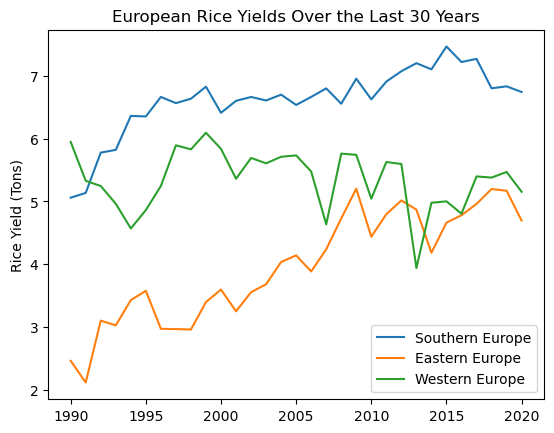

In [53]:
# Separate out sub-regions for plotting
south_euro = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Southern Europe', ['Year','Rice Yield']]
south_euro_yields = south_euro.groupby('Year')['Rice Yield'].mean()

east_euro = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Eastern Europe', ['Year','Rice Yield']]
east_euro_yields = east_euro.groupby('Year')['Rice Yield'].mean()

west_euro = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Western Europe', ['Year','Rice Yield']]
west_euro_yields = west_euro.groupby('Year')['Rice Yield'].mean()



plt.plot(south_euro_yields, label='Southern Europe'), plt.plot(east_euro_yields, label='Eastern Europe'), \
    plt.plot(west_euro_yields, label='Western Europe')

plt.legend()
# plt.xlabel('Year')
plt.ylabel('Rice Yield (Tons)')
plt.title('European Rice Yields Over the Last 30 Years')
plt.show()

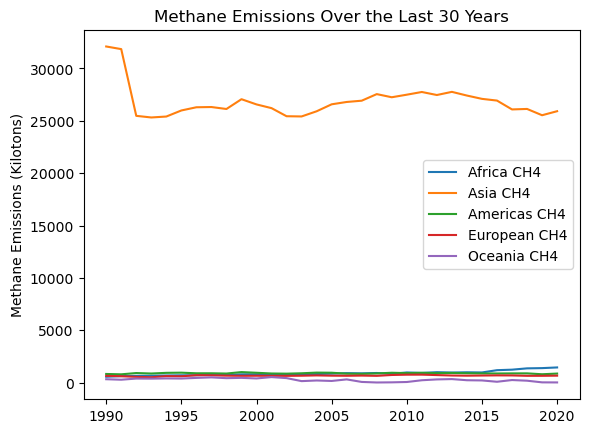

In [50]:
# Separate out regions for plotting
africa_ch4 = cleaned_yields.loc[cleaned_yields['Region'] == 'Africa', ['Year','Methane']]
africa_ch4_yields = africa_ch4.groupby('Year')['Methane'].mean()

americas_ch4 = cleaned_yields.loc[cleaned_yields['Region'] == 'Americas', ['Year','Methane']]
amer_ch4_yields = americas_ch4.groupby('Year')['Methane'].mean()

asia_ch4 = cleaned_yields.loc[cleaned_yields['Region'] == 'Asia', ['Year','Methane']]
asian_ch4_yields = asia_ch4.groupby('Year')['Methane'].mean()

europe_ch4 = cleaned_yields.loc[cleaned_yields['Region'] == 'Europe', ['Year','Methane']]
euro_ch4_yields = europe_ch4.groupby('Year')['Methane'].mean()

ocean_ch4 = cleaned_yields.loc[cleaned_yields['Region'] == 'Oceania', ['Year','Methane']]
ocean_ch4_yields = ocean_ch4.groupby('Year')['Methane'].mean()

fig4, ax4 = plt.subplots()

fig4 = 
ax4.legend()
# plt.xlabel('Year')
plt.ylabel('Methane Emissions (Kilotons)')
plt.title('Methane Emissions Over the Last 30 Years')
plt.show()

# Cause for Methane Production in Rice Cultivation:
---
Rice paddies or fields are flooded for a large portion of the year to reduce the need for pesticides to treat the plants, and the flooding of the soil produces large amounts of methane (10% of global methane emissions)


In [ ]:
north_africa = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Northern Africa', ['Year','Rice Yield']]
north_africa_yields = north_africa.groupby('Year')['Rice Yield'].mean()

sub_africa = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Sub-Saharan Africa', ['Year','Rice Yield']]
sub_africa_yields = sub_africa.groupby('Year')['Rice Yield'].mean()

latin_carib = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Latin America and the Caribbean', ['Year','Rice Yield']]
latin_carib_yields = latin_carib.groupby('Year')['Rice Yield'].mean()

aus_nz = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Australia and New Zealand', ['Year','Rice Yield']]
aus_nz_yields = aus_nz.groupby('Year')['Rice Yield'].mean()

melanesia = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Melanesia', ['Year','Rice Yield']]
melanesia_yields = melanesia.groupby('Year')['Rice Yield'].mean()
